# generate_data

In [1]:
import sys
import os
os.chdir("..")

In [2]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from classes import Problems as P

In [3]:
current_path = os.path.abspath(os.curdir)
graphs_path = current_path + '/data/'
problems_path = current_path + '/classes/'
figures_path = current_path + '/figures/'

Generate the MaxCut problem instances (graphs) that will be solved with qaoa-type optimization strategies. 
```
qaoa
    |
    |_ classes
    |
    |_ data
        |
        |_ generate_data.ipynb
        |
        |_ graph_0.nx
        .
        .
        .
        |_ graph_15.nx
    |
    |_ figures
        |
        |_ complete_graph_with_4_nodes.png
        .
        .
        .
        |_ random_regular_graph_with_10_nodes.png
    |
    .
    .
    .   
```

## Generate the graphs
Throughout the project we will use the following graphs:

- $\small{\texttt{graph}\_0}\dots,\small{\texttt{graph}\_3}$ are **complete graphs** with $n=4,6,8,10$ nodes;
- $\small{\texttt{graph}\_4}\dots,\small{\texttt{graph}\_7}$ are **Erdos-Renyi graphs** with $n=4,6,8,10$ nodes and $p=0.5$;
- $\small{\texttt{graph}\_8}\dots,\small{\texttt{graph}\_11}$ are **Complete (full) rary trees** with $n=4,6,8,10$ nodes and branching factor of 2;
- $\small{\texttt{graph}\_12}\dots,\small{\texttt{graph}\_15}$ are **random regular graphs** with $n=4,6,8,10$ nodes with degree of 3.

In [ ]:
for i in range(16):
    g = P.Problems(verbose=True)
    path = graphs_path + "graph_"+str(i)+".nx"
    with open(path, "wb") as fp:   
        pickle.dump(g, fp) 

## Check

Once the graphs have been obtained we can check the result and save the plot of each graph in the figure's directory.

In [4]:
graphs = []
for i in range(16):
    sys.path.append(current_path)
    sys.path.append(problems_path)
    path = "graph_"+str(i)+".nx"
    with open(graphs_path + path, 'rb') as f:
        g = pickle.load(f)
    graphs.append(g)

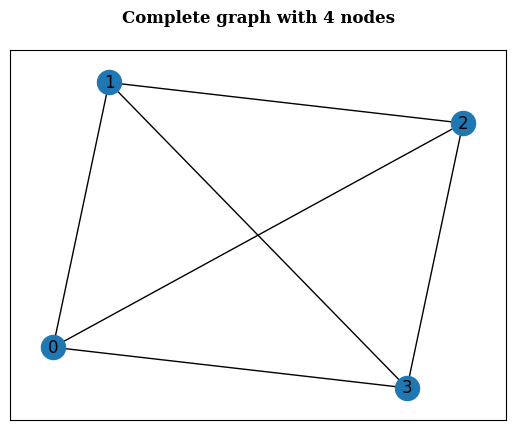

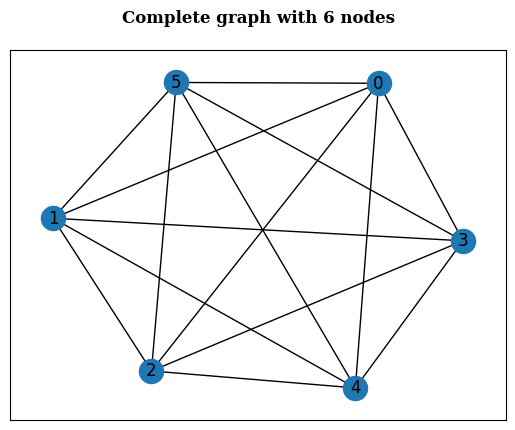

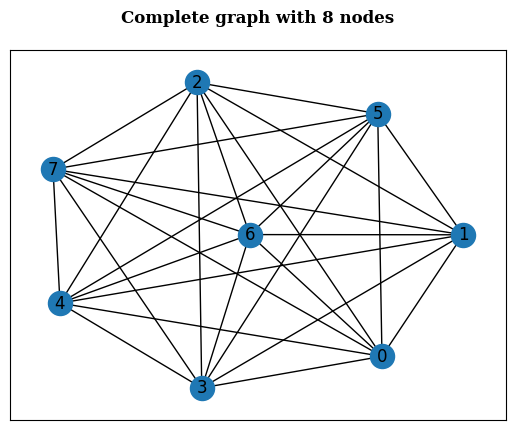

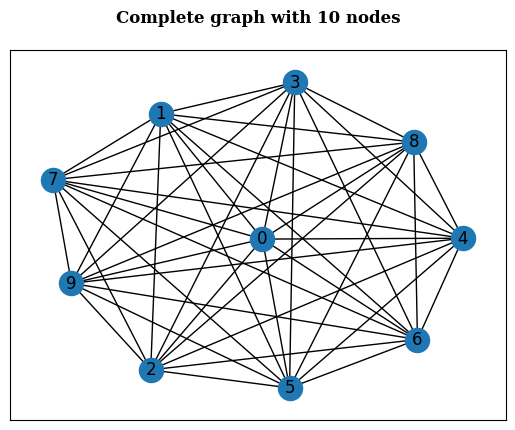

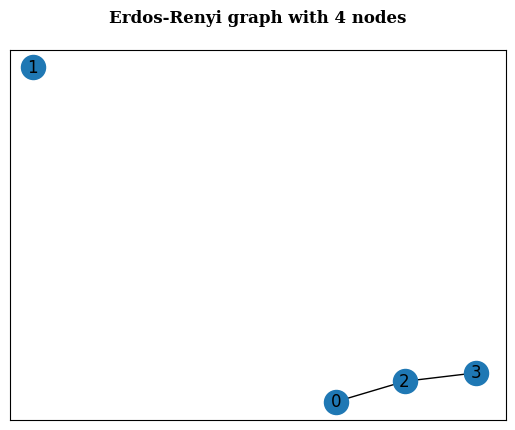

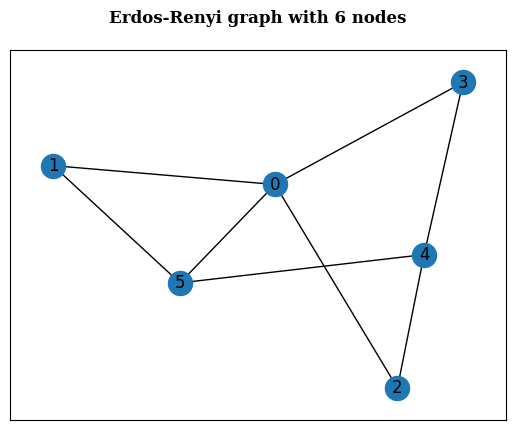

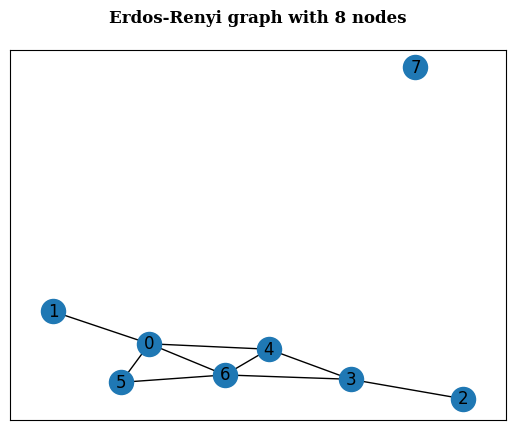

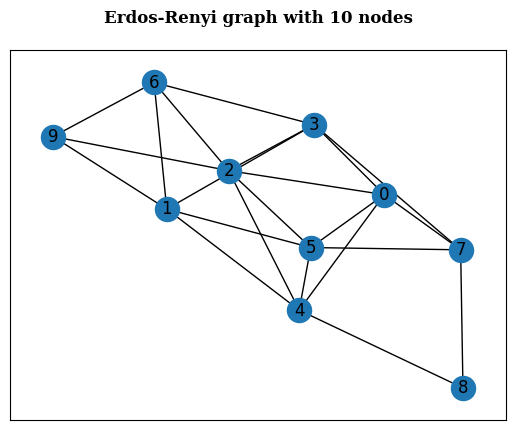

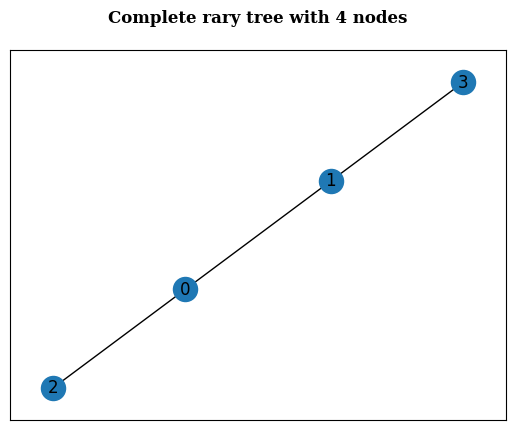

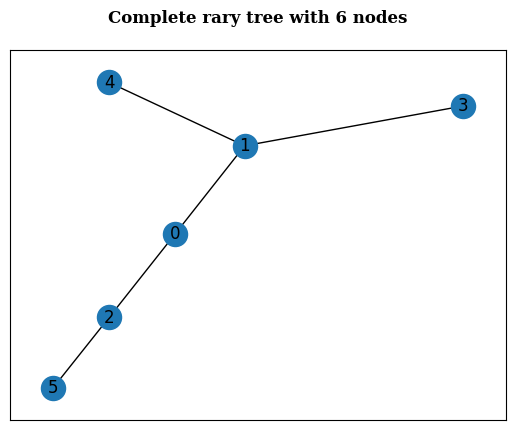

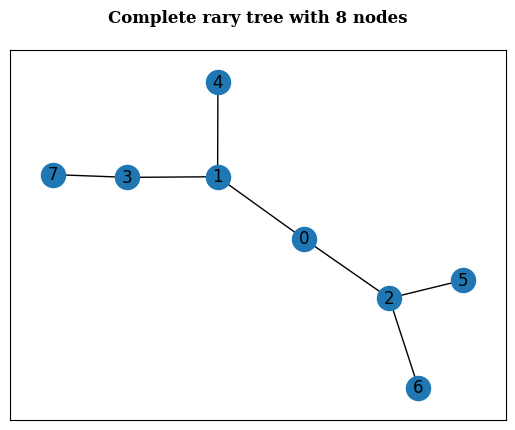

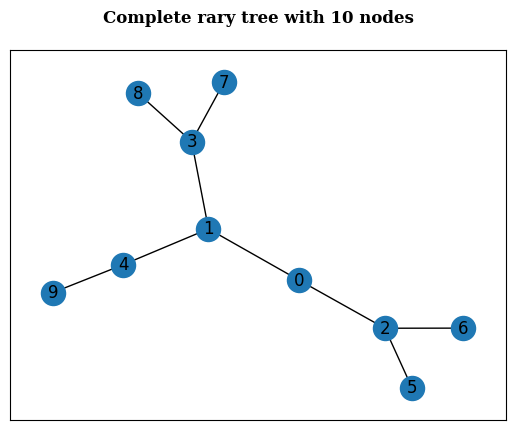

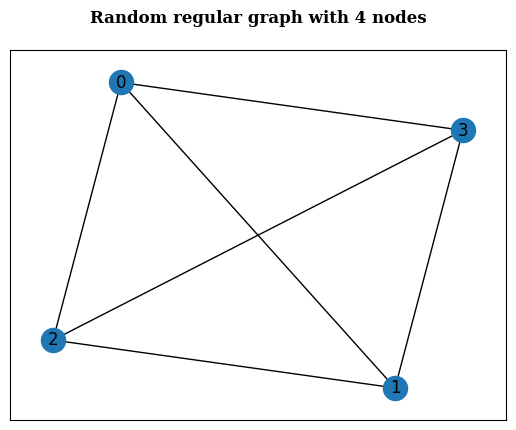

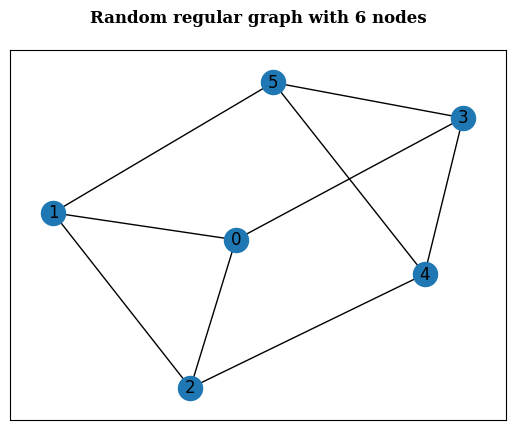

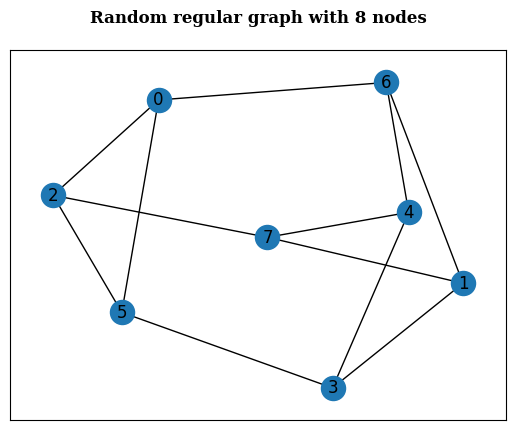

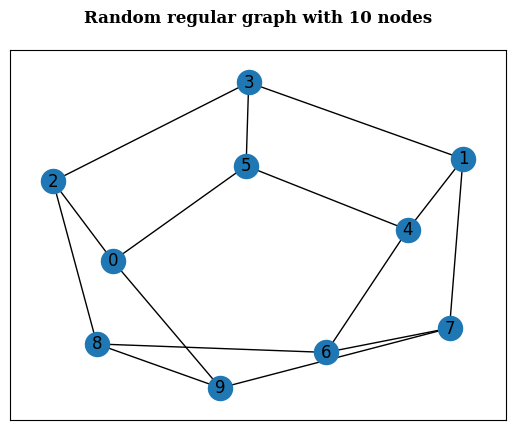

In [5]:
for i in range(16):
    plt.figure(i)
    #number of nodes (0->4, 1->6, 2->8, 3->10,...)
    j = str(i%4+4+(i%4))
    if i in range(4):
        name = "complete_graph"
        title = "Complete graph"
    elif i in range(4,8):
        name = "Erdos-Renyi_graph"
        title = "Erdos-Renyi graph"
    elif i in range(8,12):
        name = "complete_rary_tree"
        title = "Complete rary tree"
    else:
        name = "random_regular_graph"
        title = "Random regular graph"
    #plot the graphs
    plt.figure(i)
    title_font = {'family': 'serif', 'weight': 'bold', 'size': 12}
    plt.title(title + " with " + j + " nodes", fontdict=title_font, pad=20)
    graphs[i].get_draw()
    plt.savefig(figures_path + name + "_with_" + j + "_nodes")
    
plt.show()